In [1]:
# import sys
# !{sys.executable} -m pip install pyjanitor
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
from tensorflow.python.util import deprecation
import os
import logging
import seaborn as sns
import janitor

tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
def plot_single_variable(x,y,model_type,model_name,feature_name):
    y = model_type[model_name].predict(test_labels)
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y,'.', color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel('THICKNESS')
    plt.legend()
    plt.plot()

In [3]:
# set definitions
T,TT,TTT = gl.data_loader()
# ,TT,TTT,TTTx,TTT_full
T_t = T.head()
gl.thickness_renamer(T)
gl.thickness_renamer(TT)

LR = np.logspace(-3,2,6)
VS = 0.2
Epochs = 500

glathida_list = TT,T
# ,TTT,TTTx

T.name = 'T'
T_t.name = 'T_t'
TT.name = 'TT'
# TTT.name = 'TTT'
# TTTx.name = 'TTTx'
# TTT_full.name = 'TTT_full'
pth_model = '/home/sa42/notebooks/glac/saved_models/'
pth_res = '/home/sa42/notebooks/glac/saved_results/'

Importing data...
Importing T database
Importing TT database
Importing TTT database
Import complete


In [4]:
vs = 0.2
epochs = 500

# load models
linear_model = {}
dnn_model = {}
for dataset in glathida_list:
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for variable_name in list(train_features) + ['MULTI']:
        for lr in LR:
            file_name = (
            pth_model 
            + dataset.name 
            + '_linear_' 
            + variable_name 
            + '_' 
            + str(lr)
            + '_'
            + str(vs)
            + '_'
            + str(epochs)
            )
            
            linear_model[
                dataset.name 
                + '_' 
                + variable_name 
                + '_' 
                + str(lr)
            ] = tf.keras.models.load_model(file_name)
for dataset in glathida_list:
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for variable_name in list(train_features) + ['MULTI']:
        for lr in LR:
            file_name = (
            pth_model 
            + dataset.name 
            + '_dnn_' 
            + variable_name 
            + '_' 
            + str(lr)
            + '_'
            + str(vs)
            + '_'
            + str(epochs)
            )
            
            dnn_model[
                dataset.name 
                + '_' 
                + variable_name 
                + '_' 
                + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            ] = tf.keras.models.load_model(file_name)
print('Models loaded')


# load histories
linear_history = {}
dnn_history = {}
for dataset in glathida_list:
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for variable_name in list(train_features) + ['MULTI']:
        for lr in LR:
            file_name = (
                pth_res 
                + dataset.name 
                +'_linear_history_'
                + variable_name 
                + '_' + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            )
            
            linear_history[
                dataset.name 
                +'_'
                + variable_name 
                + '_' 
                + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            ]= pd.read_csv(file_name)

for dataset in glathida_list:
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for variable_name in list(train_features) + ['MULTI']:
        for lr in LR:
            file_name = (
                pth_res 
                + dataset.name 
                +'_dnn_history_'
                + variable_name 
                + '_' 
                + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            )
            
            dnn_history[
                dataset.name 
                +'_'
                + variable_name 
                + '_' 
                + str(lr)
                + '_'
                + str(vs)
                + '_'
                + str(epochs)
            ] = pd.read_csv(file_name)
print('Histories loaded')

min_loss = pd.DataFrame()
fin_loss = pd.DataFrame()
for dataset in glathida_list:
    (train_features, test_features, train_labels, test_labels) = gl.data_splitter(dataset)
    for variable_name in list(train_features) + ['MULTI']:
        for lr in LR:
            file = (
            dataset.name
            +'_'
            + 'MULTI'
            + '_' 
            + str(lr)
            + '_'
            + str(vs)
            + '_'
            + str(epochs))

            m_loss = dnn_history[file].min()
            m_loss['Name'] = file
            min_loss = min_loss.append(m_loss,ignore_index=True)

            f_loss = dnn_history[file].min()
            f_loss['Name'] = file
            fin_loss = fin_loss.append(f_loss,ignore_index=True)

fin_loss = fin_loss.drop('Unnamed: 0',axis=1)
min_loss = min_loss.drop('Unnamed: 0',axis=1)
print('Results compiled')

In [27]:
for dataset in glathida_list:
    print(dataset)

     LOWER_BOUND  UPPER_BOUND   AREA  MEAN_SLOPE  THICKNESS
0           2250         2270  0.011        12.0         43
1           2270         2290  0.014        15.0         36
2           2290         2310  0.015        18.0         29
3           2310         2330  0.021        25.0         22
4           2330         2350  0.038        18.0         19
..           ...          ...    ...         ...        ...
406         4700         4800  0.479        21.0         59
407         4800         4900  0.559        23.0         44
408         4900         5000  0.545        26.0         19
409         5000         5100  0.379        24.0          3
410         5100         5200  0.016        32.0          0

[396 rows x 5 columns]
           LAT         LON    AREA  MEAN_SLOPE  THICKNESS
32   48.750000 -121.830000   2.900         0.0       58.0
33   58.380000 -134.360000  11.700         0.0       66.0
34   50.061340   87.697410   5.150         0.0       56.0
35   50.049670   87.7455

In [35]:
min_loss

,loss,val_loss,Name
0,9.346116,11.499599,TT_MULTI_0.001_0.2_500
1,8.170873,10.613503,TT_MULTI_0.01_0.2_500
2,6.918760,9.922615,TT_MULTI_0.1_0.2_500
3,10.071699,11.361288,TT_MULTI_1.0_0.2_500
4,15.237563,15.156626,TT_MULTI_10.0_0.2_500
5,15.340000,25.849220,TT_MULTI_100.0_0.2_500
6,9.346116,11.499599,TT_MULTI_0.001_0.2_500
7,8.170873,10.613503,TT_MULTI_0.01_0.2_500
8,6.918760,9.922615,TT_MULTI_0.1_0.2_500
9,10.071699,11.361288,TT_MULTI_1.0_0.2_500


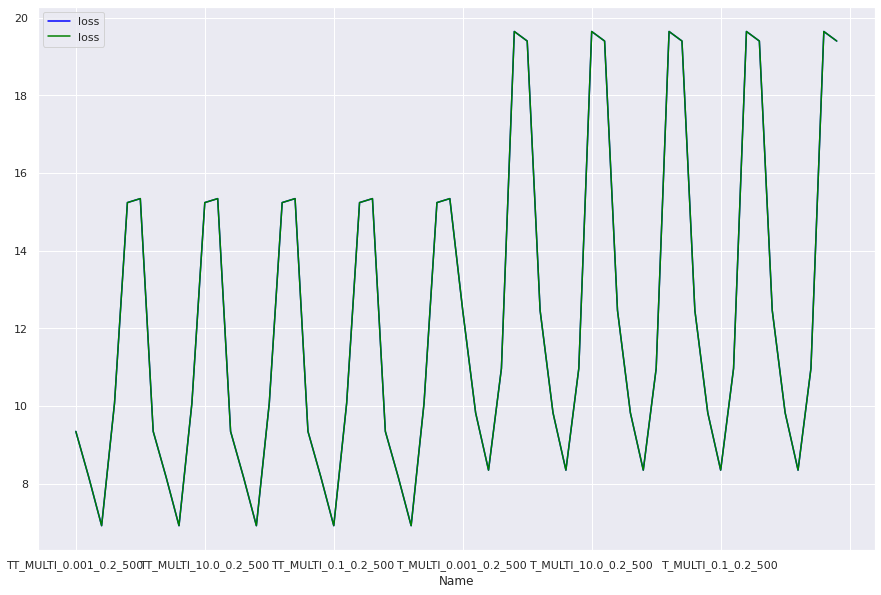

<Figure size 1080x720 with 0 Axes>

In [38]:
sns.set(rc={"figure.figsize":(15,10)})
ax = plt.gca()
fin_loss.plot(x='Name', y = 'loss', kind='line', color = 'blue', ax=ax)
# fin_loss.plot(x='Name', y = 'val_loss', kind='line',color = 'red', ax=ax)
min_loss.plot(x='Name', y = 'loss', kind='line', color = 'green', ax=ax)
# min_loss.plot(x='Name', y = 'val_loss', kind='line',color = 'orange', ax=ax)
plt.show()
plt.tight_layout()


In [9]:
fin_loss

,loss,val_loss,Name
0,12.461143,18.904200,T_MULTI_0.001_0.2_500
1,9.825756,13.830091,T_MULTI_0.01_0.2_500
2,8.349138,9.173455,T_MULTI_0.1_0.2_500
3,10.966421,11.357554,T_MULTI_1.0_0.2_500
4,19.642372,333.888092,T_MULTI_10.0_0.2_500
5,19.397217,261.766571,T_MULTI_100.0_0.2_500


(0.0, 300.0)

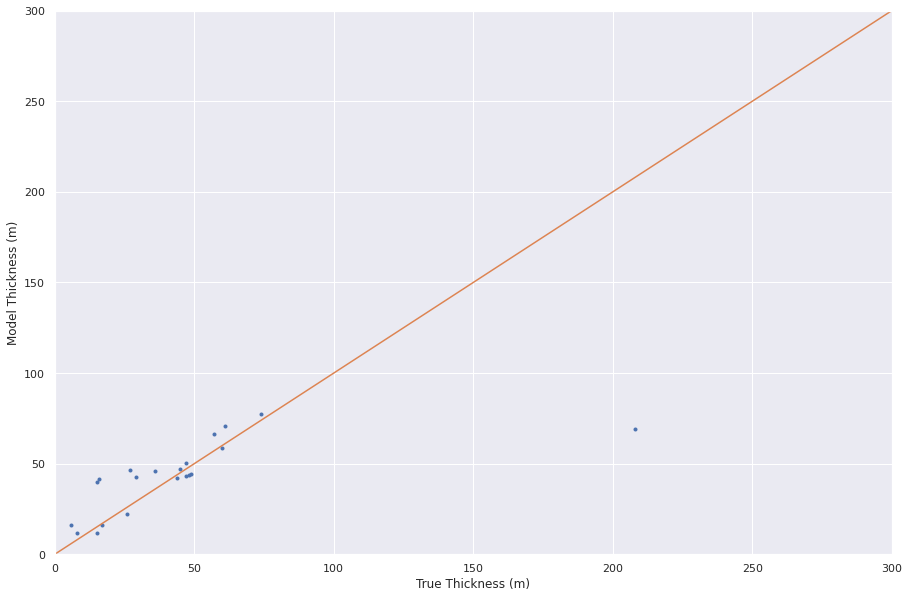

In [10]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(T)
y = dnn_model['T_MULTI_0.01_0.2_500'].predict(test_features)
fig,ax=plt.subplots(1,1,figsize=(15,10))
fig.patch.set_facecolor('w')
plt.plot(test_labels,y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,300))
plt.ylim((0,300))
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP_T")

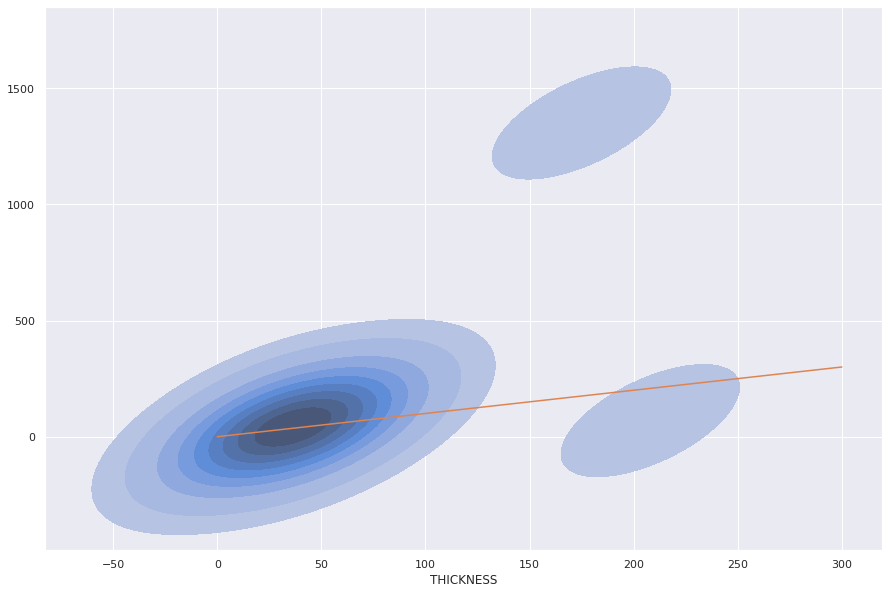

In [11]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

KeyError: 'T_LAT'

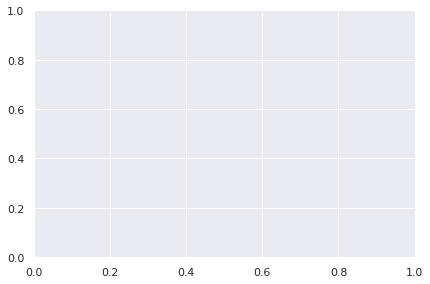

In [12]:
x = test_labels
for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    plot_single_variable(x,y,dnn_model,'T_'+variable_name,variable_name)
#     ax.set_ylim([35,140])
#     ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['T_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(dnn_history['T_'+ variable_name])
#     ax.set_ylim([35,140])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
dnn_history

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('MULTI')
gl.plot_loss(dnn_history['T_AREA100.0'])
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP_dnn_loss.eps")

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('MULTI')
gl.plot_loss(dnn_history['T_MULTI'])
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP_dnn_loss.eps")

In [ ]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(TT)
y = dnn_model['TT_MULTI'].predict(test_features)
fig,ax=plt.subplots(1,1,figsize=(15,10))
fig.patch.set_facecolor('w')
plt.plot(test_labels,y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
# plt.xlim((0,300))
# plt.ylim((0,300))
plt.xscale('log')
plt.yscale('log')

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

In [ ]:
x = test_labels
for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    plot_single_variable(x,y,dnn_model,'TT_'+variable_name,variable_name)
#     ax.set_ylim([35,140])
#     ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['TT_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(dnn_history['TT_'+ variable_name])
#     ax.set_ylim([20,45])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()


In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('MULTI')
gl.plot_loss(dnn_history['TT_MULTI'])

In [ ]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(TTT)
y = dnn_model['TTT_MULTI'].predict(test_features)
fig,ax=plt.subplots(1,1,figsize=(15,10))
fig.patch.set_facecolor('w')
plt.plot(test_labels,y,'.')
plt.plot((0,1300),(0,1300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,1300))
plt.ylim((0,1300))

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,1300),(0,1300),'-')

In [ ]:

fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['TT_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(dnn_history['TTT_'+ variable_name])
    ax.set_ylim([152,165])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('MULTI')
gl.plot_loss(dnn_history['TTT_MULTI'])

In [ ]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(TTTx)
y = dnn_model['TTTx_MULTI'].predict(test_features)
plt.plot(test_labels,y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,300))
plt.ylim((0,300))

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['TT_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(3,3,i+1)
    gl.plot_loss(dnn_history['TTTx_'+ variable_name])
    ax.set_ylim([30,40])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('TTTx_MULTI')
gl.plot_loss(dnn_history['TTTx_MULTI'])

In [ ]:
(train_features, test_features,
train_labels, test_labels) = gl.data_splitter(TTT_full)
y = dnn_model['TTT_full_MULTI'].predict(test_features)
plt.plot(test_labels,y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,300))
plt.ylim((0,300))

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(10,10))
fig.patch.set_facecolor('w')
# gl.plot_loss(dnn_history['TT_MULTI'])

for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(6,6,i+1)
    gl.plot_loss(dnn_history['TTT_full_'+ variable_name])
#     ax.set_ylim([30,40])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_title('TTT_full_MULTI')
gl.plot_loss(dnn_history['TTT_full_MULTI'])

In [ ]:
LR = np.logspace(-3,2,6)
